<a href="https://colab.research.google.com/github/Kavya2099/Asian-games-athletics-web-scraping/blob/main/Asian_games_athletics_web_scraping_initial_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Websraping project on Asian games

Getting the list of countries who bagged medals in atletics from the year 1951-2022

We'll be scarping out year, country, category, gender and medals--> gold, silver, bronze deatils from wikipedia

https://en.wikipedia.org/wiki/List_of_Asian_Games_medalists_in_athletics

In [ ]:
!pip install requests --upgrade --quiet

In [ ]:
import requests

In [ ]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_Asian_Games_medalists_in_athletics'

In [ ]:
#getting the response from url
response = requests.get(wiki_url)

In [ ]:
#getting the status code. If the status code is between 200-299, it means success
response.status_code


200

We could see have around 19 lakh text responses in the page. If we try to load entire thing here, it'll slow down the working so we are just looking into top 1000 text responses

In [ ]:
len(response.text)

1954061

In [ ]:
page_contents = response.text

In [ ]:
page_contents[:1000]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of Asian Games medalists in athletics - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d62550ba-1f28-4e8c-bed9-95a3ffc303a5","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Asian_Games_medalists_in_athletics","wgTitle":"List of Asian Games medalists in athletics","wgCurRevisionId":1113433149,"wgRevisionId":1113433149,"wgArticleId":60572864,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is diff

# Using Beautiful Soup to parse and extract information

In [ ]:
!pip install beautifulsoup4 --upgrade --quiet
from bs4 import BeautifulSoup
doc = BeautifulSoup(page_contents, 'html.parser')

Now, first we'll be getting the category of athletics. Here category refers to male/ female.

So we need to find the tag at which male and female comes in the website. So with the help of inspect element we could find that it comes in the span tag at h2



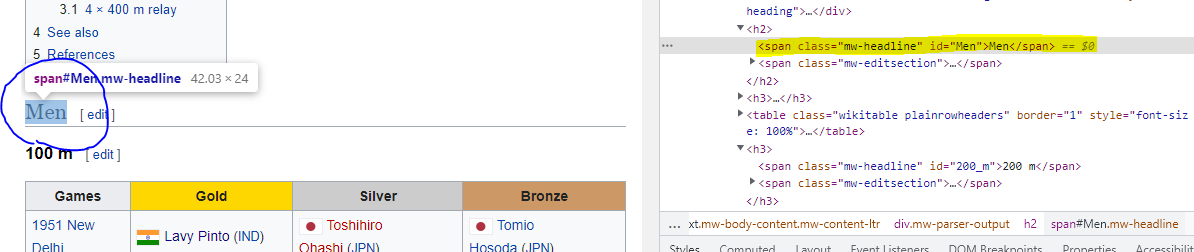

so now we'll get those h2 classes

In [ ]:
category = doc.find_all('h2')


In [ ]:
len(category)

7

so if we look at this, we could see that there are around 7 items inside span tags and we need only 3 which are male, female and mixed.

So lets split that those from others!

In [ ]:
category[1:4]

[<h2><span class="mw-headline" id="Men">Men</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_Asian_Games_medalists_in_athletics&amp;action=edit&amp;section=1" title="Edit section: Men">edit</a><span class="mw-editsection-bracket">]</span></span></h2>,
 <h2><span class="mw-headline" id="Women">Women</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_Asian_Games_medalists_in_athletics&amp;action=edit&amp;section=27" title="Edit section: Women">edit</a><span class="mw-editsection-bracket">]</span></span></h2>,
 <h2><span class="mw-headline" id="Mixed">Mixed</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_Asian_Games_medalists_in_athletics&amp;action=edit&amp;section=53" title="Edit section: Mixed">edit</a><span class="mw-editsection-bracket">]</span></span></h2>]

So here we are taking only the value and removing last '[Edit]' that is attached with the text

In [ ]:
category[3].text

'Mixed[edit]'

In [ ]:
category[3].text[:-6]

'Mixed'

In [ ]:

for i in range(1,4):
  category[i]= category[i].text[:-6]



In [ ]:
category

[<h2 id="mw-toc-heading">Contents</h2>,
 'Men',
 'Women',
 'Mixed',
 <h2><span class="mw-headline" id="See_also">See also</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_Asian_Games_medalists_in_athletics&amp;action=edit&amp;section=55" title="Edit section: See also">edit</a><span class="mw-editsection-bracket">]</span></span></h2>,
 <h2><span class="mw-headline" id="References">References</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=List_of_Asian_Games_medalists_in_athletics&amp;action=edit&amp;section=56" title="Edit section: References">edit</a><span class="mw-editsection-bracket">]</span></span></h2>,
 <h2>Navigation menu</h2>]

In [ ]:
category= category[1:4]
category

['Men', 'Women', 'Mixed']

Now we got the category!!

Next we'll focus on getting the athletic sports type



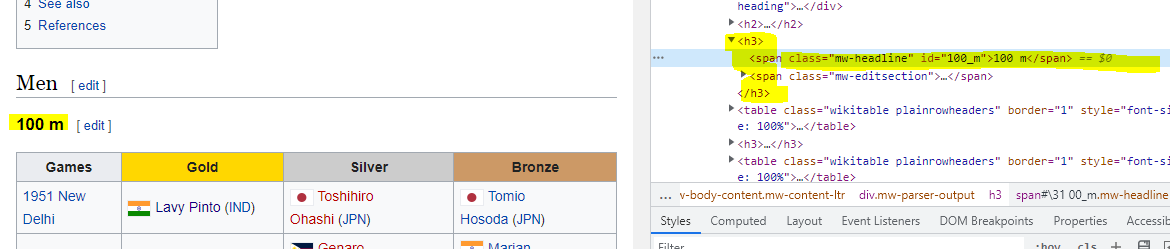

In [ ]:
selection_class = 'mw-headline'

sports_tags = doc.find_all('span', { 'class': selection_class})



In [ ]:
len(sports_tags)

56

In [ ]:
sports_tags

[<span class="mw-headline" id="Men">Men</span>,
 <span class="mw-headline" id="100_m">100 m</span>,
 <span class="mw-headline" id="200_m">200 m</span>,
 <span class="mw-headline" id="400_m">400 m</span>,
 <span class="mw-headline" id="800_m">800 m</span>,
 <span class="mw-headline" id="1500_m">1500 m</span>,
 <span class="mw-headline" id="5000_m">5000 m</span>,
 <span class="mw-headline" id="10,000_m">10,000 m</span>,
 <span class="mw-headline" id="110_m_hurdles">110 m hurdles</span>,
 <span class="mw-headline" id="400_m_hurdles">400 m hurdles</span>,
 <span class="mw-headline" id="3000_m_steeplechase">3000 m steeplechase</span>,
 <span class="mw-headline" id="4_×_100_m_relay">4 × 100 m relay</span>,
 <span class="mw-headline" id="4_×_400_m_relay">4 × 400 m relay</span>,
 <span class="mw-headline" id="Marathon">Marathon</span>,
 <span class="mw-headline" id="10,000_m_walk">10,000 m walk</span>,
 <span class="mw-headline" id="20_km_walk">20 km walk</span>,
 <span class="mw-headline" id=

Here we can see that we have category that is repeate here, and the classes that are repeated here along with last two values--> see also and references

so far now we'll split tags as female,male and mixed

In [ ]:
sports_tags[1].text

'100 m'

In [ ]:
sports_male=[]

for i in range(1,26):
  sports_male.append(sports_tags[i].text)

In [ ]:
len(sports_male)

25

In [ ]:
sports_male

['100 m',
 '200 m',
 '400 m',
 '800 m',
 '1500 m',
 '5000 m',
 '10,000 m',
 '110 m hurdles',
 '400 m hurdles',
 '3000 m steeplechase',
 '4 × 100 m relay',
 '4 × 400 m relay',
 'Marathon',
 '10,000 m walk',
 '20 km walk',
 '50 km walk',
 'High jump',
 'Pole vault',
 'Long jump',
 'Triple jump',
 'Shot put',
 'Discus throw',
 'Hammer throw',
 'Javelin throw',
 'Decathlon']

In [ ]:
sports_female=[]

for i in range(27,52):
  sports_female.append(sports_tags[i].text)

In [ ]:
len(sports_female)

25

In [ ]:
sports_female

['100 m',
 '200 m',
 '400 m',
 '800 m',
 '1500 m',
 '3000 m',
 '5000 m',
 '10,000 m',
 '100 m hurdles',
 '400 m hurdles',
 '3000 m steeplechase',
 '4 × 100 m relay',
 '4 × 400 m relay',
 'Marathon',
 '10,000 m walk',
 '20 km walk',
 'High jump',
 'Pole vault',
 'Long jump',
 'Triple jump',
 'Shot put',
 'Discus throw',
 'Hammer throw',
 'Javelin throw',
 'Heptathlon']

In [ ]:
sports_mixed=[]


sports_mixed.append(sports_tags[53].text)
sports_mixed

['4 × 400 m relay']

So totally we have 25 sports in male, 25 sports in female and 1 in mixed, which sums upto 51 categories. 



Now we'll look into the year column.

In [ ]:
table=doc.find_all('table')
len(doc.find_all('table'))

54

We have 54 tables where as we have only 51 categories. 

We need to be careful when creating a dataframe with tables with those categories such that each categories matches with the table.

In [ ]:
table[0].text


'\n\nGames\n\nGold\n\nSilver\n\nBronze\n\n\n1951 New Delhi\n\n\xa0Lavy Pinto\xa0(IND)\n\n\xa0Toshihiro Ohashi\xa0(JPN)\n\n\xa0Tomio Hosoda\xa0(JPN)\n\n\n1954 Manila\n\n\xa0Abdul Khaliq\xa0(PAK)\n\n\xa0Genaro Cabrera\xa0(PHI)\n\n\xa0Marian Gabriel\xa0(IND)\n\n\n1958 Tokyo\n\n\xa0Abdul Khaliq\xa0(PAK)\n\n\xa0Kyohei Ushio\xa0(JPN)\n\n\xa0Isaac Gomez\xa0(PHI)\n\n\n1962 Jakarta\n\n\xa0Mohammad Sarengat\xa0(INA)\n\n\xa0Mani Jegathesan\xa0(MAL)\n\n\xa0Rogelio Onofre\xa0(PHI)\n\n\n1966 Bangkok\n\n\xa0Mani Jegathesan\xa0(MAL)\n\n\xa0C. Kunalan\xa0(SIN)\n\n\xa0Hideo Iijima\xa0(JPN)\n\n\n1970 Bangkok\n\n\xa0Masahide Jinno\xa0(JPN)\n\n\xa0Anat Ratanapol\xa0(THA)\n\n\xa0C. Kunalan\xa0(SIN)\n\n\n1974 Tehran\n\n\xa0Anat Ratanapol\xa0(THA)\n\n\xa0Masahide Jinno\xa0(JPN)\n\n\xa0Suchart Jairsuraparp\xa0(THA)\n\n\n1978 Bangkok\n\n\xa0Suchart Jairsuraparp\xa0(THA)\n\n\xa0Ramaswamy Gnanasekaran\xa0(IND)\n\n\xa0Suh Mal-gu\xa0(KOR)\n\n\n1982 New Delhi\n\n\xa0Rabuan Pit\xa0(MAL)\n\n\xa0Jang Jae-keun\xa0(KOR)\

In [ ]:
import pandas as pd

df=pd.read_html(str(table[0]))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.head()

,Games,Gold,Silver,Bronze
0,1951 New Delhi,Lavy Pinto (IND),Toshihiro Ohashi (JPN),Tomio Hosoda (JPN)
1,1954 Manila,Abdul Khaliq (PAK),Genaro Cabrera (PHI),Marian Gabriel (IND)
2,1958 Tokyo,Abdul Khaliq (PAK),Kyohei Ushio (JPN),Isaac Gomez (PHI)
3,1962 Jakarta,Mohammad Sarengat (INA),Mani Jegathesan (MAL),Rogelio Onofre (PHI)
4,1966 Bangkok,Mani Jegathesan (MAL),C. Kunalan (SIN),Hideo Iijima (JPN)


Here we need to modify and add few things

1. I need to add gender and sports with this dataframe
2. I need to change the column name of Games to Year an extract only the year
3. I need only the country name from the other three columns

In [ ]:
#making our changes
#adding columns
df['Category']='Male'
df['Sports']= sports_male[0]
df.head()


,Games,Gold,Silver,Bronze,Category,Sports
0,1951 New Delhi,Lavy Pinto (IND),Toshihiro Ohashi (JPN),Tomio Hosoda (JPN),Male,100 m
1,1954 Manila,Abdul Khaliq (PAK),Genaro Cabrera (PHI),Marian Gabriel (IND),Male,100 m
2,1958 Tokyo,Abdul Khaliq (PAK),Kyohei Ushio (JPN),Isaac Gomez (PHI),Male,100 m
3,1962 Jakarta,Mohammad Sarengat (INA),Mani Jegathesan (MAL),Rogelio Onofre (PHI),Male,100 m
4,1966 Bangkok,Mani Jegathesan (MAL),C. Kunalan (SIN),Hideo Iijima (JPN),Male,100 m


In [ ]:
#changing column name

df.rename(columns = {'Games':'Year'}, inplace = True)
df.head()

,Year,Gold,Silver,Bronze,Category,Sports
0,1951 New Delhi,Lavy Pinto (IND),Toshihiro Ohashi (JPN),Tomio Hosoda (JPN),Male,100 m
1,1954 Manila,Abdul Khaliq (PAK),Genaro Cabrera (PHI),Marian Gabriel (IND),Male,100 m
2,1958 Tokyo,Abdul Khaliq (PAK),Kyohei Ushio (JPN),Isaac Gomez (PHI),Male,100 m
3,1962 Jakarta,Mohammad Sarengat (INA),Mani Jegathesan (MAL),Rogelio Onofre (PHI),Male,100 m
4,1966 Bangkok,Mani Jegathesan (MAL),C. Kunalan (SIN),Hideo Iijima (JPN),Male,100 m


In [ ]:
""" a= '1951 New Delhi'

a= a.split(' ')
a= a[0]
a ---> 1951

"""

def get_year(year):
  year=year.split(' ')[0]
  return year

df['Year']= df['Year'].apply(get_year)

df.head()

,Year,Gold,Silver,Bronze,Category,Sports
0,1951,Lavy Pinto (IND),Toshihiro Ohashi (JPN),Tomio Hosoda (JPN),Male,100 m
1,1954,Abdul Khaliq (PAK),Genaro Cabrera (PHI),Marian Gabriel (IND),Male,100 m
2,1958,Abdul Khaliq (PAK),Kyohei Ushio (JPN),Isaac Gomez (PHI),Male,100 m
3,1962,Mohammad Sarengat (INA),Mani Jegathesan (MAL),Rogelio Onofre (PHI),Male,100 m
4,1966,Mani Jegathesan (MAL),C. Kunalan (SIN),Hideo Iijima (JPN),Male,100 m


In [ ]:
"""df = pd.DataFrame({'year': ['1 [1991]', '10 [1991-2001]', '8 [1991-1998]', '2 [2000-2002]']})

df['year'] = df['year'].str.extract(r'\[(.*)\]')  --> gives 1991 1991-2002 1991-1998 2000-2002 --> values inside square brackets"""


#we will use the same here

df['Gold']=df.Gold.str.extract(r'\((.*)\)')
df['Silver']=df.Silver.str.extract(r'\((.*)\)')
df['Bronze']=df.Bronze.str.extract(r'\((.*)\)')

df.head()

,Year,Gold,Silver,Bronze,Category,Sports
0,1951,IND,JPN,JPN,Male,100 m
1,1954,PAK,PHI,IND,Male,100 m
2,1958,PAK,JPN,PHI,Male,100 m
3,1962,INA,MAL,PHI,Male,100 m
4,1966,MAL,SIN,JPN,Male,100 m


In [ ]:
a= df.copy()
df1= df.copy()
a.append(df1)

len(a)

18

In [ ]:
df1=pd.read_html(str(table[1]))
# convert list to dataframe
df1=pd.DataFrame(df1[0])
df1['Category']='Male'
df1['Sports']= sports_male[1]
df1.rename(columns = {'Games':'Year'}, inplace = True)
df1['Year']= df1['Year'].apply(get_year)
df1['Gold']=df1.Gold.str.extract(r'\((.*)\)')
df1['Silver']=df1.Silver.str.extract(r'\((.*)\)')
df1['Bronze']=df1.Bronze.str.extract(r'\((.*)\)')

df1.head()

,Year,Gold,Silver,Bronze,Category,Sports
0,1951,IND,IND,JPN,Male,200 m
1,1954,PAK,PAK,HKG,Male,200 m
2,1958,IND,PAK,PHI,Male,200 m
3,1962,MAL,JPN,INA,Male,200 m
4,1966,MAL,IND,MAL,Male,200 m


In [ ]:
df=df.append(df1,ignore_index=True)
len(df)

36

In [ ]:
df

,Year,Gold,Silver,Bronze,Category,Sports
0,1951,IND,JPN,JPN,Male,100 m
1,1954,PAK,PHI,IND,Male,100 m
2,1958,PAK,JPN,PHI,Male,100 m
3,1962,INA,MAL,PHI,Male,100 m
4,1966,MAL,SIN,JPN,Male,100 m
5,1970,JPN,THA,SIN,Male,100 m
6,1974,THA,JPN,THA,Male,100 m
7,1978,THA,IND,KOR,Male,100 m
8,1982,MAL,KOR,THA,Male,100 m
9,1986,QAT,JPN,CHN,Male,100 m


So now we have got the idea of how to create each dataframe for each category and merge it with existing one. so we'll put it function or loop to get it for all type of sports and all type of categories

In [ ]:
#checking tables

table[24].text

"\n\nGames\n\nGold\n\nSilver\n\nBronze\n\n\n1951 New Delhi\n\n\xa0Fumio Nishiuchi\xa0(JPN)\n\n\xa0Bunkichi Sawada\xa0(JPN)\n\n\xa0Khurshid Ahmed\xa0(IND)\n\n\n1954 Manila\n\n\xa0Yang Chuan-kwang\xa0(ROC)\n\n\xa0Fumio Nishiuchi\xa0(JPN)\n\n\xa0Ronnie O'Brien\xa0(IND)\n\n\n1958 Tokyo\n\n\xa0Yang Chuan-kwang\xa0(ROC)\n\n\xa0Kiyoshi Katsuki\xa0(JPN)\n\n\xa0Shosuke Suzuki\xa0(JPN)\n\n\n1962 Jakarta\n\n\xa0Gurbachan Singh Randhawa\xa0(IND)\n\n\xa0Shosuke Suzuki\xa0(JPN)\n\n\xa0Cyril Perera\xa0(MAL)\n\n\n1966 Bangkok\n\n\xa0Wu Ah-min\xa0(ROC)\n\n\xa0Yukio Nogami\xa0(JPN)\n\n\xa0Hiroomi Yamada\xa0(JPN)\n\n\n1970 Bangkok\n\n\xa0Junichi Onizuka\xa0(JPN)\n\n\xa0M. G. Shetty\xa0(IND)\n\n\xa0Wang Ying-shih\xa0(ROC)\n\n\n1974 Tehran\n\n\xa0Vijay Singh Chauhan\xa0(IND)\n\n\xa0Junichi Onizuka\xa0(JPN)\n\n\xa0Suresh Babu\xa0(IND)\n\n\n1978 Bangkok\n\n\xa0Hisashi Iwai\xa0(JPN)\n\n\xa0Prapant Srisathorn\xa0(THA)\n\n\xa0Jin Xuewei\xa0(CHN)\n\n\n1982 New Delhi\n\n\xa0Weng Kangqiang\xa0(CHN)\n\n\xa0Zhai Yin

table 0 - 24 constitues for male category atheletics

In [ ]:
table[25].text

'\n\nGames\n\nGold\n\nSilver\n\nBronze\n\n\n1951 New Delhi\n\n\xa0Kiyoko Sugimura\xa0(JPN)\n\n\xa0Roshan Mistry\xa0(IND)\n\n\xa0Kimiko Okamoto\xa0(JPN)\n\n\n1954 Manila\n\n\xa0Atsuko Nambu\xa0(JPN)\n\n\xa0Mary Klass\xa0(SIN)\n\n\xa0Christine Brown\xa0(IND)\n\n\n1958 Tokyo\n\n\xa0Inocencia Solis\xa0(PHI)\n\n\xa0Sakura Fukuyama\xa0(JPN)\n\n\xa0Yuko Kobayashi\xa0(JPN)\n\n\n1962 Jakarta\n\n\xa0Mona Sulaiman\xa0(PHI)\n\n\xa0Ikuko Yoda\xa0(JPN)\n\n\xa0Takako Inokuchi\xa0(JPN)\n\n\n1966 Bangkok\n\n\xa0Miho Sato\xa0(JPN)\n\n\xa0Ritsuko Sukegawa\xa0(JPN)\n\n\xa0Debra Marcus\xa0(ISR)\n\n\n1970 Bangkok\n\n\xa0Chi Cheng\xa0(ROC)\n\n\xa0Keiko Yamada\xa0(JPN)\n\n\xa0Carolina Rieuwpassa\xa0(INA)\n\n\n1974 Tehran\n\n\xa0Esther Roth\xa0(ISR)\n\n\xa0He Zufen\xa0(CHN)\n\n\xa0Keiko Yamada\xa0(JPN)\n\n\n1978 Bangkok\n\n\xa0Yin Yaping\xa0(CHN)\n\n\xa0Yukiko Osako\xa0(JPN)\n\n\xa0Usanee Laopinkarn\xa0(THA)\n\n\n1982 New Delhi\n\n\xa0Lydia de Vega\xa0(PHI)\n\n\xa0P. T. Usha\xa0(IND)\n\n\xa0Mo Myung-hee\xa0(KO

In [ ]:
table[49].text

'\n\nGames\n\nGold\n\nSilver\n\nBronze\n\n\n1966 Bangkok\n\n\xa0Michiko Okamoto\xa0(JPN)\n\n\xa0Yeh Chu-mei\xa0(ROC)\n\n\xa0Lolita Lagrosas\xa0(PHI)\n\n\n1970 Bangkok\n\n\xa0Esther Shahamorov\xa0(ISR)\n\n\xa0Lin Chun-yu\xa0(ROC)\n\n\xa0Lolita Lagrosas\xa0(PHI)\n\n\n1974 Tehran\n\n\xa0Kyoko Shimizu\xa0(JPN)\n\n\xa0Sun Yuxiang\xa0(CHN)\n\n\xa0Zhang Yumei\xa0(CHN)\n\n\n1978 Bangkok\n\n\xa0Ye Peisu\xa0(CHN)\n\n\xa0Angel Mary Joseph\xa0(IND)\n\n\xa0Guo Yu\xa0(CHN)\n\n\n1982 New Delhi\n\n\xa0Ye Peisu\xa0(CHN)\n\n\xa0Ye Lianying\xa0(CHN)\n\n\xa0Tomoko Uchida\xa0(JPN)\n\n\n1986 Seoul\n\n\xa0Zhu Yuqing\xa0(CHN)\n\n\xa0Ye Lianying\xa0(CHN)\n\n\xa0Ji Jeong-mi\xa0(KOR)\n\n\n1990 Beijing\n\n\xa0Ma Miaolan\xa0(CHN)\n\n\xa0Dong Yuping\xa0(CHN)\n\n\xa0Ma Chun-ping\xa0(TPE)\n\n\n1994 Hiroshima\n\n\xa0Ghada Shouaa\xa0(SYR)\n\n\xa0Zhang Xiaohui\xa0(CHN)\n\n\xa0Ma Chun-ping\xa0(TPE)\n\n\n1998 Bangkok\n\n\xa0Shen Shengfei\xa0(CHN)\n\n\xa0Svetlana Kazanina\xa0(KAZ)\n\n\xa0Ma Chun-ping\xa0(TPE)\n\n\n2002 Bus

table 25- 49 constitues for female category atheletics

In [ ]:
#table[50] for mixed
table[50].text

'\n\nGames\n\nGold\n\nSilver\n\nBronze\n\n\n2018 Jakarta–Palembang\n\n\xa0India\xa0(IND)Muhammed AnasM. R. PoovammaHima DasArokia Rajiv\n\n\xa0Kazakhstan\xa0(KAZ)Svetlana GolendovaDmitriy KoblovElina MikhinaMikhail Litvin\n\n\xa0China\xa0(CHN)Cheng ChongYang LeiHuang GuifenWu Yuang\n'

In [ ]:
table[51].text

'vteLists of Asian Games medalistsSummer sports\nArchery\nArtistic swimming\nAthletics\nBadminton\nBaseball\nBasketball\nBeach volleyball\nBoard games\nBoxing\nCanoeing\nCricket\nCycling\nDancesport\nDiving\nDragon boat\nEquestrian\nFencing\nField hockey\nFootball\nGolf\nGymnastics\nHandball\nJudo\nJu-jitsu\nKabaddi\nKarate\nKurash\nModern pentathlon\nRoller sports\nRowing\nRugby union\nSailing\nSepak takraw\nShooting\nSoft tennis\nSoftball\nSport climbing\nSquash\nSwimming\nTable tennis\nTaekwondo\nTennis\nTriathlon\nVolleyball\nWater polo\nWeightlifting\nWrestling\nWushu\nWinter sports\nAlpine skiing\nBiathlon\nCross-country skiing\nCurling\nFigure skating\nFreestyle skiing\nIce hockey\nShort-track speed skating\nSki jumping\nSnowboarding\nSpeed skating\nDiscontinued sports\nBandy\nBodybuilding\nBowling\nCue sports\nJet ski\nMartial arts\nParagliding\nSki orienteering\n'

So we need to focus on table 0 - 50 with matching each category

In [ ]:
sports= sports_male+ sports_female +sports_mixed
len(sports)

51

In [ ]:
category

['Men', 'Women', 'Mixed']

# Dataset preparation

In [ ]:
data= pd.DataFrame()
for i in range(0,51):
  source=pd.read_html(str(table[i]))
  # convert list to dataframe
  atheletics=pd.DataFrame(source[0])
  if(i<=24):
    j=0
  elif(i<50 and i>24):
    j=1
  else:
    j=2
  atheletics['Category']=category[j]
  atheletics['Sports']= sports[i]
  atheletics.rename(columns = {'Games':'Year'}, inplace = True)
  atheletics['Year']= atheletics['Year'].apply(get_year)
  atheletics['Gold']=atheletics.Gold.str.extract(r'\((.*)\)')
  atheletics['Silver']=atheletics.Silver.str.extract(r'\((.*)\)')
  atheletics['Bronze']=atheletics.Bronze.str.extract(r'\((.*)\)')
  print("Appending "+sports[i]+ "in "+category[j])
  data=data.append(atheletics,ignore_index=True)


Appending 100 min Men
Appending 200 min Men
Appending 400 min Men
Appending 800 min Men
Appending 1500 min Men
Appending 5000 min Men
Appending 10,000 min Men
Appending 110 m hurdlesin Men
Appending 400 m hurdlesin Men
Appending 3000 m steeplechasein Men
Appending 4 × 100 m relayin Men
Appending 4 × 400 m relayin Men
Appending Marathonin Men
Appending 10,000 m walkin Men
Appending 20 km walkin Men
Appending 50 km walkin Men
Appending High jumpin Men
Appending Pole vaultin Men
Appending Long jumpin Men
Appending Triple jumpin Men
Appending Shot putin Men
Appending Discus throwin Men
Appending Hammer throwin Men
Appending Javelin throwin Men
Appending Decathlonin Men
Appending 100 min Women
Appending 200 min Women
Appending 400 min Women
Appending 800 min Women
Appending 1500 min Women
Appending 3000 min Women
Appending 5000 min Women
Appending 10,000 min Women
Appending 100 m hurdlesin Women
Appending 400 m hurdlesin Women
Appending 3000 m steeplechasein Women
Appending 4 × 100 m relayi

In [ ]:
data

,Year,Gold,Silver,Bronze,Category,Sports
0,1951,IND,JPN,JPN,Men,100 m
1,1954,PAK,PHI,IND,Men,100 m
2,1958,PAK,JPN,PHI,Men,100 m
3,1962,INA,MAL,PHI,Men,100 m
4,1966,MAL,SIN,JPN,Men,100 m
...,...,...,...,...,...,...
727,2006,KAZ,IND,IND,Women,Heptathlon
728,2010,UZB,JPN,IND,Women,Heptathlon
729,2014,UZB,CHN,UZB,Women,Heptathlon
730,2018,IND,CHN,JPN,Women,Heptathlon


In [ ]:
data[data.Sports == '4 × 400 m relay']

,Year,Gold,Silver,Bronze,Category,Sports
199,1951,IND,JPN,PHI,Men,4 × 400 m relay
200,1954,JPN,IND,PHI,Men,4 × 400 m relay
201,1958,JPN,ROC,PHI,Men,4 × 400 m relay
202,1962,IND,MAL,JPN,Men,4 × 400 m relay
203,1966,JPN,MAL,SIN,Men,4 × 400 m relay
204,1970,JPN,IND,MAL,Men,4 × 400 m relay
205,1974,SRI,IND,IRN,Men,4 × 400 m relay
206,1978,JPN,IND,IRQ,Men,4 × 400 m relay
207,1982,JPN,IRQ,CHN,Men,4 × 400 m relay
208,1986,JPN,IRQ,PHI,Men,4 × 400 m relay


Finally we have created our dataset, but I want to create another dataset which contains country codes with full country names.

Let's see how can we do that.

I'll take the list from https://en.wikipedia.org/wiki/List_of_IOC_country_codes

# Country code dataset

In [ ]:
country_url = 'https://en.wikipedia.org/wiki/List_of_IOC_country_codes'
country_response = requests.get(country_url)
country_response.status_code

200

In [ ]:
page_contents = country_response.text
c_doc = BeautifulSoup(page_contents, 'html.parser')
table=c_doc.find_all('table')
len(c_doc.find_all('table'))

10

In [ ]:
table[0].text

"\n\nCode\n\nNational Olympic Committee\n\nOther codes used\n\nLink\n\n\nAFG\n\xa0Afghanistan\n\n[1]\n\n\nALB\n\xa0Albania\n\n[2]\n\n\nALG\n\xa0Algeria\nAGR (1964)AGL (1968 S) from Spanish Argelia\n[3]\n\n\nAND\n\xa0Andorra\n\n[4]\n\n\nANG\n\xa0Angola\nANO (As referenced in IAAF World Championships Beijing 2015 Statistics Handbook)[7]\n[5]\n\n\nANT\n\xa0Antigua and Barbuda\n\n[6]\n\n\nARG\n\xa0Argentina\n\n[7]\n\n\nARM\n\xa0Armenia\n\n[8]\n\n\nARU\n\xa0Aruba\n\n[9]\n\n\nASA\n\xa0American Samoa\nAMS[7]\n[10]\n\n\nAUS\n\xa0Australia\n\n[11]\n\n\nAUT\n\xa0Austria\ncurrent code from French Autriche\n[12]\n\n\nAZE\n\xa0Azerbaijan\n\n[13]\n\n\nBAH\n\xa0Bahamas\n\n[14]\n\n\nBAN\n\xa0Bangladesh\n\n[15]\n\n\nBAR\n\xa0Barbados\nBAD (1964)\n[16]\n\n\nBDI\n\xa0Burundi\n\n[17]\n\n\nBEL\n\xa0Belgium\n\n[18]\n\n\nBEN\n\xa0Benin\nDAY (1964)DAH (1968–1976) as Dahomey\n[19]\n\n\nBER\n\xa0Bermuda\n\n[20]\n\n\nBHU\n\xa0Bhutan\n\n[21]\n\n\nBIH\n\xa0Bosnia and Herzegovina\nBSH (1992 S), BOS[7] current code 

In [ ]:
#changing table 0 to dataframe

country=pd.read_html(str(table[0]))
# convert list to dataframe
country=pd.DataFrame(country[0])
country.tail()

,Code,National Olympic Committee,Other codes used,Link
201,VIE,Vietnam,VET (1964)VNM (1968–1976),[202]
202,VIN,Saint Vincent and the Grenadines,NaN,[203]
203,YEM,Yemen,NaN,[204]
204,ZAM,Zambia,NRH (1964) as Northern Rhodesia,[205]
205,ZIM,Zimbabwe,RHO (1960–1972) as Rhodesia,[206]


In [ ]:
#From here we'll take the Nation and Code

country= country[['Code',	'National Olympic Committee',	'Other codes used']]


In [ ]:
country.head()

,Code,National Olympic Committee,Other codes used
0,.mw-parser-output .monospaced{font-family:mono...,Afghanistan,NaN
1,ALB,Albania,NaN
2,ALG,Algeria,AGR (1964)AGL (1968 S) from Spanish Argelia
3,AND,Andorra,NaN
4,ANG,Angola,ANO (As referenced in IAAF World Championships...


So here I could see for country Afghanistan, the record seems to have some extra values. We need to remove that.

But before that we need to check if there is any other code that is similar like this.

We'll check that by using the length of the code

In [ ]:
for i in country.Code:
  if len(i) >3:
    print(i)

.mw-parser-output .monospaced{font-family:monospace,monospace}AFG


It seems that only the first value has this. We'll manually change that here

In [ ]:
country.Code[0]='AFG'
country.Code[0]

'AFG'

In [ ]:
country

,Code,National Olympic Committee,Other codes used
0,AFG,Afghanistan,NaN
1,ALB,Albania,NaN
2,ALG,Algeria,AGR (1964)AGL (1968 S) from Spanish Argelia
3,AND,Andorra,NaN
4,ANG,Angola,ANO (As referenced in IAAF World Championships...
...,...,...,...
201,VIE,Vietnam,VET (1964)VNM (1968–1976)
202,VIN,Saint Vincent and the Grenadines,NaN
203,YEM,Yemen,NaN
204,ZAM,Zambia,NRH (1964) as Northern Rhodesia


The reason for adding this dataset is beacause, we could see some countries have use different country codes for the specific time period. 

This data set will help to identify the old and new country codes in that cases.

# Saving the datasets

In [384]:
# saving the dataframe
data.to_csv('Athletics_record.csv')

country.to_csv('Country_code.csv')

#Things I've learnt

- Basic concepts of web screaping using Beautiful soup
- Findall() to get the html tags and sections
- Using tables to extract wikipedia table infomration is very easy 


#Things to implement in future
- Scraping multi pages in wikipedia using wikipedia and urllib2 pacakages
- Including scraping of href links for the dataset
- Scraping someother sites apart from wikipedia


# References

- https://www.youtube.com/watch?v=RKsLLG-bzEY&t=4592s
- https://en.wikipedia.org/wiki/List_of_Asian_Games_medalists_in_athletics
- https://jovian.ai/aakashns-6l3/scraping-github-topics-repositories-rough
- https://www.w3resource.com/python-exercises/BeautifulSoup/python-beautifulsoup-exercise-9.php
- https://www.pylenin.com/blogs/python-beautiful-soup/
- https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
- https://www.appsloveworld.com/pandas/100/144/how-to-extract-only-the-string-component-between-parenthesis
- https://en.wikipedia.org/wiki/List_of_IOC_country_codes